Liquidy ratio
current ratio = current assets/ current liabilities
quick ratio = (cash+S/T investment + acct rec)/current liabilities

receivables turnover ratio = net sales revenue/avg accounts receivable
inventory turnover ratio = cost of goods sold/average inventory

Solvency ratio
Debt to asset ratio = total liabilities/total assets
debt to equity ratio = total liabilities/total equity
times interest earned ratio = (NPAT + int exp + tax exp)/int exp

current assets
cash 
ST investment
acct receivable

current liabilities

total assets
total liabilities
total equity

NPAT
interest expenses
tax expenses

EPS
PE
market cap (to select the firms)

Can we predict when ASX listed companies are about to be delisted from the market? 

In [72]:
# Importing libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import date
# Winsorising 
from scipy.stats.mstats import winsorize

# for Transformation
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew
from scipy import stats

# sklearn regressions and modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Importing Data
df1 = pd.read_excel('Data/finresults listed.xlsx')
df2 = pd.read_excel('Data/finresults listed(1).xlsx')
df3 = pd.read_excel('Data/finresults delisted.xlsx')
df4 = pd.read_excel('Data/finresults delisted(1).xlsx')

In [5]:
# GICS sector
df5 = pd.read_excel('Data/advanced_listed.xlsx')
df6 = pd.read_excel('Data/advanced_delisted.xlsx')

In [6]:
# Making a copy
df1a = df1.copy()
df2a = df2.copy()
df3a = df3.copy()
df4a = df4.copy()
df5a = df5.copy()
df6a = df6.copy()

In [7]:
# writing a function to transform the dataset
def transforming(data, var):
    # Identifying str position
    data['new'] = data[var].str.find('-',start=1)+2
    data['new'] = data['new'].astype('int')
    
    # Creating a new column with boolean which contains str
    data["CF"] = data[var].str.contains("Annual Cash Flow")
    cf = data["CF"].sum()
    data["BS"] = data[var].str.contains("Annual Balance Sheet")
    bs = data["BS"].sum()
    data["PL"] = data[var].str.contains("Annual Profit and Loss")
    pl = data["PL"].sum()
    data["market"] = data[var].str.contains("Annual Ratio Analysis")
    market = data["market"].sum()
    
#     print(cf)
#     print(bs)
#     print(pl)
#     print(market)
    
    # Renaming the values
    if cf>0: 
        word_count_cf = int(data.loc[data["CF"]==1, 'new'].mean())
        data.loc[data['CF']==True, var] = data.Item.str.slice(word_count_cf)
#         print(word_count_cf)
    if bs>0: 
        word_count_bs = int(data.loc[data["BS"]==1, 'new'].mean())
        data.loc[data['BS']==True, var] = data.Item.str.slice(word_count_bs)
#         print(word_count_bs)
    if pl>0:
        word_count_pl = int(data.loc[data["PL"]==1, 'new'].mean())
        data.loc[data['PL']==True, var] = data.Item.str.slice(word_count_pl)
#         print(word_count_pl)
    if market>0:
        word_count_market = int(data.loc[data["market"]==1, 'new'].mean())
        data.loc[data['market']==True, var] = data.Item.str.slice(word_count_market)
#         print(word_count_market)



In [8]:
# transforming the data including BS, PL, CF, market information
transforming(df1a, 'Item')
transforming(df2a, 'Item')
transforming(df3a, 'Item')
transforming(df4a, 'Item')


In [9]:
# saving each file under different year
# df1a
for i in range(2010,2021):
    locals()['df1a_{0}'.format(i)] = df1a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df1a_{0}'.format(i)]['year'] = i
# df2a
for i in range(2010,2021):
    locals()['df2a_{0}'.format(i)] = df2a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df2a_{0}'.format(i)]['year'] = i
# df3a
for i in range(2010,2021):
    locals()['df3a_{0}'.format(i)] = df3a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df3a_{0}'.format(i)]['year'] = i    
# df4a
for i in range(2010,2021):
    locals()['df4a_{0}'.format(i)] = df4a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df4a_{0}'.format(i)]['year'] = i

In [10]:
# df1a listed 
balance_sheet_listed = df1a_2010.append([df1a_2011,
                                  df1a_2012,
                                  df1a_2013,
                                  df1a_2014,
                                  df1a_2015,
                                  df1a_2016,
                                  df1a_2017,
                                  df1a_2018,
                                  df1a_2019,
                                  df1a_2020])
# df2a listed
income_statement_listed = df2a_2010.append([df2a_2011,
                                  df2a_2012,
                                  df2a_2013,
                                  df2a_2014,
                                  df2a_2015,
                                  df2a_2016,
                                  df2a_2017,
                                  df2a_2018,
                                  df2a_2019,
                                  df2a_2020])
# df3a delisted 
balance_sheet_delisted = df3a_2010.append([df3a_2011,
                                  df3a_2012,
                                  df3a_2013,
                                  df3a_2014,
                                  df3a_2015,
                                  df3a_2016,
                                  df3a_2017,
                                  df3a_2018,
                                  df3a_2019,
                                  df3a_2020])
# df4a delisted
income_statement_delisted = df4a_2010.append([df4a_2011,
                                  df4a_2012,
                                  df4a_2013,
                                  df4a_2014,
                                  df4a_2015,
                                  df4a_2016,
                                  df4a_2017,
                                  df4a_2018,
                                  df4a_2019,
                                  df4a_2020])


# Merging data

In [11]:
# combined data for GICs code
df7a = df5a.append(df6a)

In [12]:
# listed firms
financial_listed = balance_sheet_listed.merge(income_statement_listed, how='left', on=['ASX Code','year'])
financial_listed = financial_listed.merge(df7a, how='left', on=['ASX Code'])


In [13]:
# delisted firms
financial_delisted = balance_sheet_delisted.merge(income_statement_delisted, how='left', on=['ASX Code','year'])
financial_delisted = financial_delisted.merge(df7a, how='left', on=['ASX Code'])


In [14]:
financial_delisted['delisted'] = 1

In [15]:
# Combining both datasets
both_financial = financial_listed.append(financial_delisted)


In [16]:
# replacing the missing values to zero for feature (delisted)
both_financial.loc[both_financial['delisted'].isna()==True, 'delisted'] = 0

In [17]:
both_financial['delisted'].value_counts()

0.0    23694
1.0    11396
Name: delisted, dtype: int64

In [18]:
# converting to numeric
convert_numeric = ['CA Cash', 'CA Investments', 'CA Receivables', 'Total Assets', 
                  'Total Curr. Liabilities', 'Total Current Assets', 'Total Equity', 
                  'Total Liabilities', 'EPS After Abnormals (cents/', 'Interest Expense',
                  'Market Cap.($)', 'Reported NPAT After Abnorma', 'Tax Expense', 
                  'Weighted Average Number of']
for i in both_financial[convert_numeric]:
    both_financial[i] = pd.to_numeric(both_financial[i], 
                                        errors='coerce',
                                       downcast='float')
# both_financial.info()

In [19]:
# sorting the data by code and year
both_financial = both_financial.sort_values(by=['ASX Code','year'])

In [20]:
both_financial.isna().sum()

ASX Code                           0
CA Cash                        11664
CA Investments                 11664
CA Receivables                 11664
Total Assets                   11551
Total Curr. Liabilities        11804
Total Current Assets           11654
Total Equity                   11684
Total Liabilities              11635
year                               0
EPS After Abnormals (cents/    11512
Interest Expense               15936
Market Cap.($)                 11505
Reported NPAT After Abnorma    11495
Tax Expense                    11495
Weighted Average Number of     11511
Company Name                    1144
Status                          1144
GICS Sector                     1144
GICS Industry Group             1144
GICS Industry                   1144
delisted                           0
dtype: int64

In [363]:
both_financiala = both_financial.copy()

In [364]:
# dropping the missing GICS Sector
# missing GICS Sector are index
missing_val = both_financiala['GICS Sector'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [365]:
# dropping the missing Market Cap.($)
# missing Market Cap.($) indicates the firm is not listed
missing_val = both_financiala['Market Cap.($)'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [366]:
# dropping the missing Total Curr. Liabilities
missing_val = both_financiala['Total Curr. Liabilities'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [367]:
# dropping the missing Total Equity
missing_val = both_financiala['Total Equity'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [368]:
# dropping the missing Total Assets
missing_val = both_financiala['Total Assets'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [369]:
# dropping the missing EPS After Abnormals (cents/
missing_val = both_financiala['EPS After Abnormals (cents/'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [370]:
# dropping the missing CA Cash
missing_val = both_financiala['CA Cash'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [371]:
# dropping 0 Market Cap
both_financiala = both_financiala.loc[both_financiala['Market Cap.($)']>0]

In [372]:
# dropping if missing GICS Sector
missing_val = both_financiala['GICS Sector'].isna()
both_financiala = both_financiala.loc[both_financiala['GICS Sector'] != '--']

## keeping delisted firms in the last 2 years only

In [373]:
# reindexing
both_financiala = both_financiala.reset_index()
del both_financiala['index']

In [374]:
# identifying the last year
last_row_index = both_financiala.groupby('ASX Code').apply(lambda g: g.index[-1])
second_last_row_ind = both_financiala.groupby('ASX Code').apply(lambda g: g.index[-1]-1)
second_last_row_ind

ASX Code
14D        0
1AD        4
1AG       15
1AL       19
1PG       27
       ...  
ZIM    20810
ZLD    20821
ZMI    20832
ZNC    20843
ZNO    20854
Length: 2756, dtype: int64

In [375]:
both_financiala['last_row'] = "No"
both_financiala.loc[last_row_index, 'last_row'] = "Yes"


In [376]:
# Second last year
# both_financiala.loc[second_last_row_ind, 'last_row'] = "Yes"


In [377]:
# prob just trying the final 2 years of data only

In [378]:
both_financiala = both_financiala.loc[(both_financiala['delisted']==0) | 
                    (both_financiala['delisted']==1) &
                    (both_financiala['last_row']=='Yes') ]

In [379]:
both_financiala.loc[both_financiala['last_row']=='Yes', 'delisted'].value_counts()

0.0    1880
1.0     876
Name: delisted, dtype: int64

In [380]:
both_financiala['delisted'].value_counts()

0.0    16343
1.0      876
Name: delisted, dtype: int64

# Calculating Liquidity and Solvency ratios

Liquidy ratio
current ratio = current assets/ current liabilities
quick ratio = (cash+S/T investment + acct rec)/current liabilities

receivables turnover ratio = net sales revenue/avg accounts receivable
inventory turnover ratio = cost of goods sold/average inventory

Solvency ratio
Debt to asset ratio = total liabilities/total assets
debt to equity ratio = total liabilities/total equity
times interest earned ratio = (NPAT + int exp + tax exp)/int exp

In [381]:
# current ratio 
both_financiala['ca_t'] = both_financiala['Total Current Assets'] / both_financiala['Total Curr. Liabilities']
# both_financiala['ca_t1'] = both_financiala.groupby('ASX Code')['ca_t'].shift(1) 

CA Cash
CA Investments
CA Receivables
Total Assets
Total Curr. Liabilities
Total Current Assets
Total Equity
Total Liabilities
year
EPS After Abnormals (cents/
Interest Expense
Market Cap.($)
Reported NPAT After Abnorma
Tax Expense
Weighted Average Number of


In [382]:
both_financiala['cash_inv_acc_rec'] = both_financiala['CA Cash'] + both_financiala['CA Investments'] + both_financiala['CA Receivables']
both_financiala.loc[both_financiala['cash_inv_acc_rec']<1, 'cash_inv_acc_rec'] = 1

In [383]:
# Total Curr. Liabilities
both_financiala.loc[both_financiala['Total Curr. Liabilities']<1, 'Total Curr. Liabilities'] = 1

In [384]:
# Total Current Assets
both_financiala.loc[both_financiala['Total Current Assets']<1, 'Total Current Assets'] = 1

In [385]:
# Total Equity
both_financiala['Total Equity'] = both_financiala['Total Equity'].abs()
both_financiala.loc[both_financiala['Total Equity']<1, 'Total Equity'] = 1

In [386]:
# Total Liabilities
both_financiala['Total Liabilities'] = both_financiala['Total Liabilities'].abs()
both_financiala.loc[both_financiala['Total Liabilities']<1, 'Total Liabilities'] = 1

In [387]:
# Interest Expense
both_financiala.loc[both_financiala['Interest Expense']>=0, 'Interest Expense'] = 1
missing_val = both_financiala['Interest Expense'].isna()
both_financiala.loc[missing_val, 'Interest Expense'] = 1

In [388]:
# Tax Expense
both_financiala.loc[both_financiala['Tax Expense']>=0, 'Tax Expense'] = 1

In [389]:
# Ratios

In [390]:
# Liquidity Ratio
both_financiala['Current Ratio'] = both_financiala['Total Current Assets'] / both_financiala['Total Curr. Liabilities']
both_financiala['Quick Ratio'] = both_financiala['cash_inv_acc_rec'] / both_financiala['Total Curr. Liabilities']

# Solvency Ratio
both_financiala['Debt to Asset'] = both_financiala['Total Liabilities'] / both_financiala['Total Assets']
both_financiala['Debt to Equity'] = both_financiala['Total Liabilities'] / both_financiala['Total Equity']
both_financiala['Time Interest earned'] = (both_financiala['Reported NPAT After Abnorma'] + both_financiala['Interest Expense'] - both_financiala['Tax Expense']) / both_financiala['Interest Expense']
# dummy interest coverage
both_financiala['Interest Coverage'] = 0
both_financiala.loc[both_financiala['Time Interest earned']>2, 'Interest Coverage'] = 1


# Profitability Ratio
both_financiala['ROE'] = both_financiala['Reported NPAT After Abnorma'] / both_financiala['Total Equity']
both_financiala['ROA'] = both_financiala['Reported NPAT After Abnorma'] / both_financiala['Total Assets']
both_financiala['BV'] = (both_financiala['Total Equity']/both_financiala['Weighted Average Number of'])
both_financiala['d_loss'] = 0 
both_financiala.loc[both_financiala['Reported NPAT After Abnorma'] < 0, 'd_loss'] = 1


In [391]:
# replacing the negative values to zero for Time Interest earned
both_financiala.loc[both_financiala['Time Interest earned']<0, 'Time Interest earned'] = 0

In [392]:
both_financiala.to_excel('check.xls')

<ipython-input-392-1fe2246161a9>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  both_financiala.to_excel('check.xls')


In [393]:
ratios = ['Current Ratio', 'Quick Ratio', 'Debt to Asset', 'Debt to Equity', 'Interest Coverage',
         'ROE', 'ROA', 'd_loss']

In [394]:
ratios1 = ['Current Ratio', 'Quick Ratio', 'Debt to Asset', 'Debt to Equity', 'Interest Coverage']

In [395]:
ratios2 = ['Current Ratio', 'Debt to Asset', 'Debt to Equity', ]

In [396]:
# Winsorising 
from scipy.stats.mstats import winsorize

In [397]:
for name in both_financiala[ratios]:
    both_financiala[name+"_w1"] = winsorize(both_financiala[name], 
                                           limits = [0.01,0.01])
    both_financiala[name+"_w5"] = winsorize(both_financiala[name], 
                                           limits = [0.05,0.05])

In [306]:
ratios_w1 = ['Current Ratio_w1', 'Quick Ratio_w1', 'Debt to Asset_w1', 'Debt to Equity_w1', 'Interest Coverage_w1',
         'ROE_w1', 'ROA_w1', 'd_loss_w1']

In [307]:
ratios_w5 = ['Current Ratio_w5', 'Quick Ratio_w5', 'Debt to Asset_w5', 'Debt to Equity_w5', 'Interest Coverage_w5',
         'ROE_w5', 'ROA_w5']

In [200]:
both_financiala[ratios_w1].describe().T

,count,mean,std,min,25%,50%,75%,max
Current Ratio_w1,16206.0,7.593515e+00,1.604220e+01,0.017382,1.088189,2.273781,6.478550,1.095288e+02
Quick Ratio_w1,16206.0,7.124730e+00,1.586175e+01,0.011665,0.741259,1.764515,5.886527,1.085024e+02
Debt to Asset_w1,16206.0,6.047668e-01,1.886978e+00,0.004964,0.073603,0.257717,0.503841,1.640749e+01
Debt to Equity_w1,16206.0,1.126311e+00,2.752796e+00,0.004988,0.079451,0.347194,1.004773,2.115818e+01
Time Interest earned_w1,16206.0,5.779266e+06,3.151364e+07,0.000000,0.000000,0.000000,74.129887,2.601970e+08
ROE_w1,16206.0,-8.270568e-01,2.810592e+00,-21.997143,-0.544861,-0.107629,0.066920,8.380802e-01
ROA_w1,16206.0,-5.779513e-01,1.928463e+00,-15.124896,-0.399784,-0.086086,0.038744,5.539488e-01
d_loss_w1,16206.0,6.445761e-01,4.786563e-01,0.000000,0.000000,1.000000,1.000000,1.000000e+00


In [403]:
# dropping 2020 
both_financiala = both_financiala.loc[both_financiala['year']<2020]

In [97]:
both_financiala['delisted'] = both_financiala['delisted'].astype(int)

# EDA

In [398]:
y = both_financiala['delisted']
X = both_financiala[ratios_w5]
X1 = both_financiala[ratios1]
X2 = both_financiala[ratios2]
X.head()

,Current Ratio_w5,Quick Ratio_w5,Debt to Asset_w5,Debt to Equity_w5,Interest Coverage_w5,ROE_w5,ROA_w5
0,20.259771,19.906103,0.039951,0.041614,1,-0.252324,-0.242243
1,10.378868,10.130681,0.178941,0.217940,1,-0.201763,-0.165659
2,23.474625,23.474625,0.042585,0.044480,0,-0.365704,-0.350130
3,12.110680,11.975158,0.082523,0.089946,0,-0.946537,-0.868425
4,5.041099,5.021365,0.195371,0.242809,0,-0.790029,-0.635680


In [399]:
both_financiala.groupby('year')['delisted'].value_counts()

year  delisted
2010  0.0         1172
      1.0           92
2011  0.0         1249
      1.0           86
2012  0.0         1300
      1.0           71
2013  0.0         1343
      1.0           90
2014  0.0         1392
      1.0           68
2015  0.0         1453
      1.0           82
2016  0.0         1533
      1.0           74
2017  0.0         1641
      1.0           82
2018  0.0         1733
      1.0           93
2019  0.0         1808
      1.0          100
2020  0.0         1719
      1.0           38
Name: delisted, dtype: int64

In [309]:
both_financiala['d_loss'].value_counts()

1    10446
0     5760
Name: d_loss, dtype: int64

In [58]:
X.head()

,Current Ratio,Quick Ratio,Debt to Asset,Debt to Equity,Time Interest earned,ROE,ROA,d_loss
0,20.259771,19.906103,0.039951,0.041614,58.321003,-0.252324,-0.242243,1
2,23.474625,23.474625,0.042585,0.044480,0.000000,-0.365704,-0.350130,1
3,12.110680,11.975158,0.082523,0.089946,0.000000,-0.946537,-0.868425,1
4,5.041099,5.021365,0.195371,0.242809,0.000000,-0.790029,-0.635680,1
6,0.595655,0.470723,0.445382,0.803044,0.000000,0.063993,0.035492,0


In [59]:
X.describe()

,Current Ratio,Quick Ratio,Debt to Asset,Debt to Equity,Time Interest earned,ROE,ROA,d_loss
count,1.620600e+04,1.620600e+04,16206.000000,16206.000000,1.620600e+04,16206.000000,16206.000000,16206.000000
mean,1.149014e+04,1.021222e+04,7.536419,2.602665,2.107048e+07,-1.598730,-6.867154,0.644576
std,1.460023e+06,1.297398e+06,284.833252,95.091049,6.615411e+08,101.226013,630.079346,0.478656
min,3.644248e-05,1.622718e-08,0.000008,0.000008,0.000000e+00,-11192.037109,-78994.468750,0.000000
25%,1.088189e+00,7.412592e-01,0.073603,0.079451,0.000000e+00,-0.544861,-0.399784,0.000000
50%,2.273781e+00,1.764515e+00,0.257717,0.347194,0.000000e+00,-0.107629,-0.086086,1.000000
75%,6.478550e+00,5.886527e+00,0.503841,1.004773,7.412989e+01,0.066920,0.038744,1.000000
max,1.858676e+08,1.651647e+08,27440.498047,11712.800781,5.631114e+10,5649.981934,5202.124023,1.000000


In [60]:
X.corr()

,Current Ratio,Quick Ratio,Debt to Asset,Debt to Equity,Time Interest earned,ROE,ROA,d_loss
Current Ratio,1.000000,1.000000,-0.000187,0.000036,-0.000186,0.000126,0.000086,-0.010590
Quick Ratio,1.000000,1.000000,-0.000188,0.000036,-0.000186,0.000126,0.000086,-0.010591
Debt to Asset,-0.000187,-0.000188,1.000000,-0.000370,-0.000808,0.000125,-0.067103,0.007511
Debt to Equity,0.000036,0.000036,-0.000370,1.000000,-0.000441,-0.861693,0.000157,0.009266
Time Interest earned,-0.000186,-0.000186,-0.000808,-0.000441,1.000000,0.000783,0.000380,-0.042848
ROE,0.000126,0.000126,0.000125,-0.861693,0.000783,1.000000,0.027972,-0.025794
ROA,0.000086,0.000086,-0.067103,0.000157,0.000380,0.027972,1.000000,-0.011268
d_loss,-0.010590,-0.010591,0.007511,0.009266,-0.042848,-0.025794,-0.011268,1.000000


<AxesSubplot:>

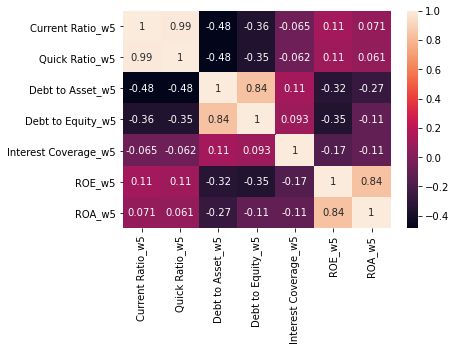

In [400]:
sns.heatmap(X.corr(), annot=True, fmt='.2g')

In [62]:
both_financiala.loc[both_financiala['delisted']==1][ratios].describe()

,Current Ratio,Quick Ratio,Debt to Asset,Debt to Equity,Time Interest earned,ROE,ROA,d_loss
count,1582.000000,1.582000e+03,1582.000000,1582.000000,1.582000e+03,1582.000000,1582.000000,1582.000000
mean,133.941086,1.329408e+02,31.726027,3.644786,6.843482e+06,-1.564600,-2.913810,0.630847
std,3748.260986,3.737941e+03,538.901550,22.937414,7.918075e+07,18.137146,164.066101,0.482728
min,0.000133,2.023691e-07,0.000008,0.000008,0.000000e+00,-369.483490,-3367.801025,0.000000
25%,0.562487,3.483920e-01,0.165672,0.198569,0.000000e+00,-0.714939,-0.441941,0.000000
50%,1.357175,1.002631e+00,0.419529,0.722739,1.918910e+00,-0.091538,-0.069013,1.000000
75%,3.496073,2.857573e+00,0.761811,1.584785,3.739307e+01,0.071637,0.040331,1.000000
max,132316.000000,1.323160e+05,14073.093750,476.285706,2.800142e+09,361.026886,5202.124023,1.000000


In [63]:
both_financiala.loc[both_financiala['delisted']==0][ratios].describe()

,Current Ratio,Quick Ratio,Debt to Asset,Debt to Equity,Time Interest earned,ROE,ROA,d_loss
count,1.462400e+04,1.462400e+04,14624.000000,14624.000000,1.462400e+04,14624.000000,14624.000000,14624.000000
mean,1.271869e+04,1.130263e+04,4.919645,2.489933,2.260954e+07,-1.602422,-7.294822,0.646061
std,1.536964e+06,1.365769e+06,241.758392,99.820152,6.958960e+08,106.394577,661.087646,0.478207
min,3.644248e-05,1.622718e-08,0.000348,0.000348,0.000000e+00,-11192.037109,-78994.468750,0.000000
25%,1.141803e+00,7.907430e-01,0.069342,0.074509,0.000000e+00,-0.532391,-0.396122,0.000000
50%,2.415613e+00,1.892425e+00,0.241126,0.317742,0.000000e+00,-0.109395,-0.088251,1.000000
75%,6.707183e+00,6.197846e+00,0.481583,0.928950,8.104062e+01,0.065948,0.038540,1.000000
max,1.858676e+08,1.651647e+08,27440.498047,11712.800781,5.631114e+10,5649.981934,4166.518066,1.000000


In [292]:
ratios_w5

['Current Ratio_w5',
 'Quick Ratio_w5',
 'Debt to Asset_w5',
 'Debt to Equity_w5',
 'Time Interest earned_w5',
 'ROE_w5',
 'ROA_w5']

Text(0.5, 1.0, 'Quick Ratio')

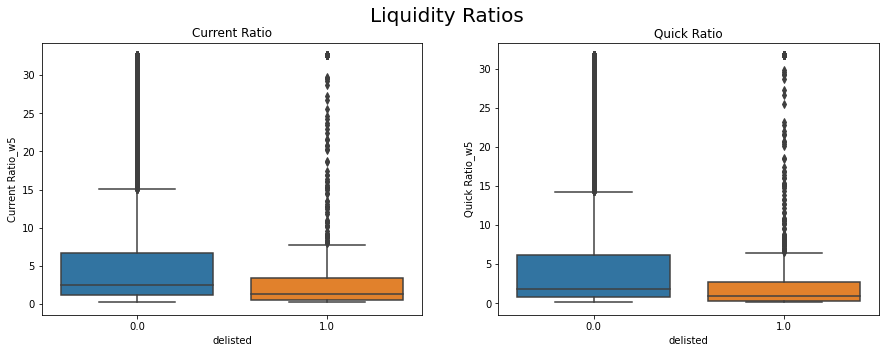

In [417]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Liquidity Ratios', size=20)
sns.boxplot(ax=axes[0], x='delisted', y='Current Ratio_w5', data=both_financiala)
axes[0].set_title('Current Ratio')
sns.boxplot(ax=axes[1], x='delisted', y='Quick Ratio_w5', data=both_financiala)
axes[1].set_title('Quick Ratio')

Text(0.5, 1.0, 'Debt to Equity_w5')

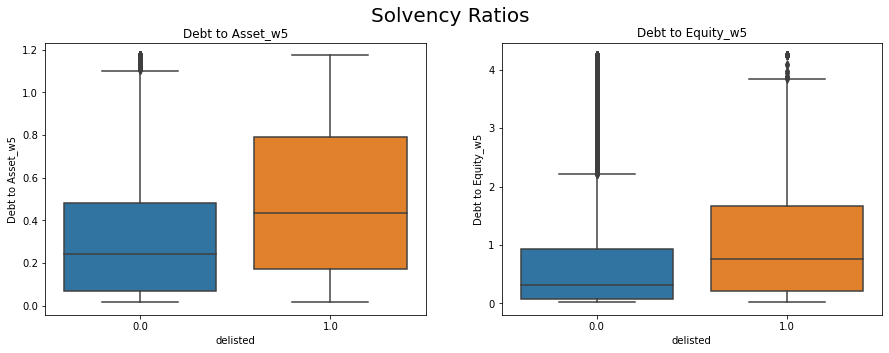

In [418]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Solvency Ratios', size=20)
sns.boxplot(ax=axes[0], x='delisted', y='Debt to Asset_w5', data=both_financiala)
axes[0].set_title('Debt to Asset_w5')
sns.boxplot(ax=axes[1], x='delisted', y='Debt to Equity_w5', data=both_financiala)
axes[1].set_title('Debt to Equity_w5')

Text(0.5, 1.0, 'ROE_w5')

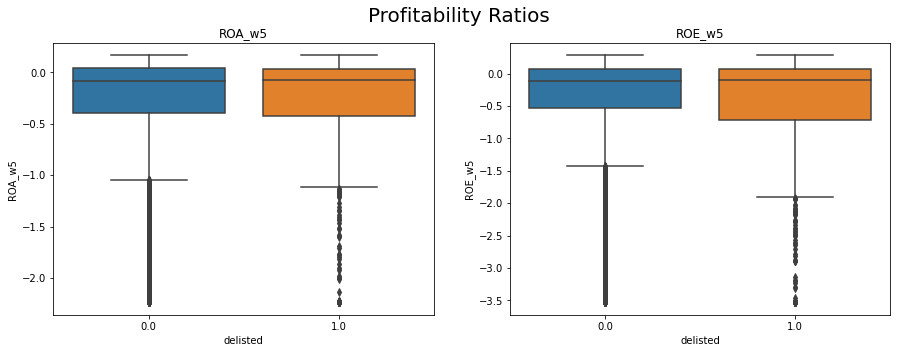

In [419]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Profitability Ratios', size=20)
sns.boxplot(ax=axes[0], x='delisted', y='ROA_w5', data=both_financiala)
axes[0].set_title('ROA_w5')
sns.boxplot(ax=axes[1], x='delisted', y='ROE_w5', data=both_financiala)
axes[1].set_title('ROE_w5')

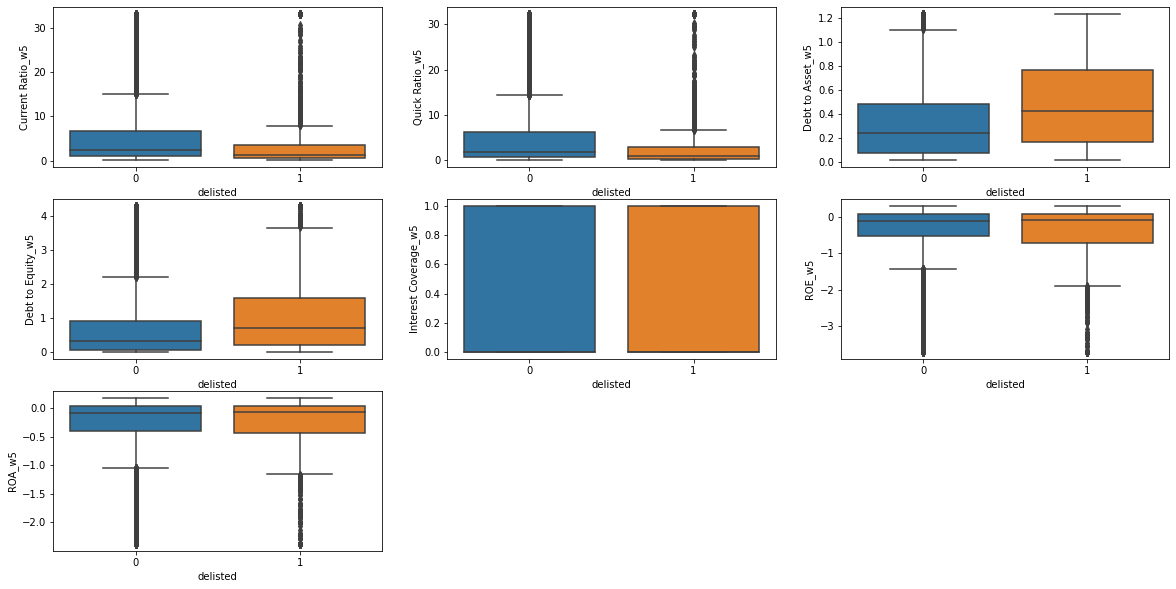

In [311]:
plt.figure(figsize=(20,10))
for i, c in enumerate(both_financiala[ratios_w5]):
    plt.subplot(3,3, i+1)
    sns.boxplot(x='delisted', y=c, data=both_financiala)
plt.show()

Text(0.5, 1.0, 'Total number of delisted companies')

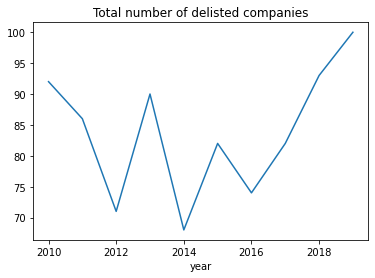

In [420]:
both_financiala.groupby('year')['delisted'].sum().plot()
plt.title("Total number of delisted companies")

# Training and test data

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# Feature scaling

In [406]:
# feature scaling/ Data standardisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Smote for under sampling

In [150]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
# from matplotlib import pyplot
from numpy import where

In [407]:
counter = Counter(y)
print(counter)

Counter({0.0: 16343, 1.0: 876})


In [408]:
# transform the dataset
oversample = SMOTE()

# using the normal data
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = oversample.fit_resample(X_test, y_test)

# using the scaled data
X_train_scaled_smote, y_train_scaled_smote = oversample.fit_resample(X_train_scaled, y_train)
X_test_scaled_smote, y_test_scaled_smote = oversample.fit_resample(X_test_scaled, y_test)

# summarize the new class distribution
counter = Counter(y_train_smote)
print(counter)
counter = Counter(y_test_smote)
print(counter)

Counter({0.0: 12261, 1.0: 12261})
Counter({0.0: 4082, 1.0: 4082})


# Logistic Regression Model

In [432]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled_smote, y_train_scaled_smote)

LogisticRegression()

In [433]:
y_pred = log_model.predict(X_test_scaled_smote)
y_pp = log_model.predict_proba(X_test_scaled_smote)
y_pp

array([[0.52283862, 0.47716138],
       [0.49662166, 0.50337834],
       [0.69520451, 0.30479549],
       ...,
       [0.43528043, 0.56471957],
       [0.40771516, 0.59228484],
       [0.63088865, 0.36911135]])

In [434]:
confusion = metrics.confusion_matrix(y_test_scaled_smote, y_pred)
print(confusion)

[[2559 1523]
 [1689 2393]]


In [412]:
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [249]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [435]:
print(metrics.accuracy_score(y_test_scaled_smote, y_pred))

0.6065654091131798


In [436]:
print(1 - metrics.accuracy_score(y_test_scaled_smote, y_pred))

0.3934345908868202


In [437]:
print(classification_report(y_test_scaled_smote, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61      4082
         1.0       0.61      0.59      0.60      4082

    accuracy                           0.61      8164
   macro avg       0.61      0.61      0.61      8164
weighted avg       0.61      0.61      0.61      8164



In [439]:
scores = cross_val_score(log_model, X_train_scaled_smote, y_train_scaled_smote, cv=5)
scores.mean()

0.6060678752745892

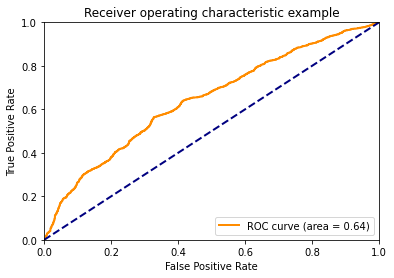

In [440]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = log_model.predict_proba(X_test_scaled_smote)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test_scaled_smote, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Support Vector Machines

In [423]:
from sklearn import svm
from sklearn.datasets import make_blobs

In [424]:
clf = svm.SVC(kernel = 'rbf', C = 1)


In [441]:
clf.fit(X_train_scaled_smote, y_train_scaled_smote)

SVC(C=1)

In [442]:
y_pred = clf.predict(X_test_scaled_smote)

In [443]:
print("Accuracy:",metrics.accuracy_score(y_test_scaled_smote, y_pred))

Accuracy: 0.5880695737383635


In [444]:
print("Precision:",metrics.precision_score(y_test_scaled_smote, y_pred))

Precision: 0.6140183951791944


In [445]:
print("Recall:",metrics.recall_score(y_test_scaled_smote, y_pred))

Recall: 0.4742773150416463


# Naive Bayes

In [448]:
from sklearn.naive_bayes import GaussianNB

In [449]:
NB_model = GaussianNB()

In [450]:
NB_model.fit(X_train_scaled_smote, y_train_scaled_smote)

GaussianNB()

Accuracy is:  0.5699412052915238
              precision    recall  f1-score   support

         0.0       0.55      0.75      0.64      4082
         1.0       0.61      0.39      0.47      4082

    accuracy                           0.57      8164
   macro avg       0.58      0.57      0.56      8164
weighted avg       0.58      0.57      0.56      8164



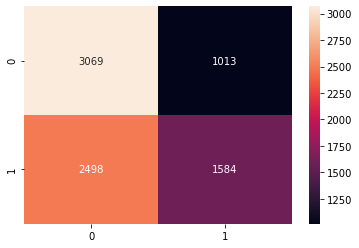

In [452]:
y_pred = NB_model.predict(X_test_scaled_smote)
ac = accuracy_score(y_test_scaled_smote, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test_scaled_smote, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test_scaled_smote, y_pred))

# Gridsearch

In [453]:
from sklearn.model_selection import GridSearchCV

In [454]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs.fit(X_train_scaled_smote, y_train_scaled_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jinyan

/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jinyan

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [455]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 10, 'penalty': 'l2'}
0.6062309741532844


In [92]:
# gridsearch SVM
from sklearn.grid_search import GridSearchCV

svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1)
svc_gs.fit(X, y)

NameError: name 'SVC' is not defined

In [ ]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)